# Practical Linear Algebra for Data Science
## Mike X Cohen (sincxpress.com)
### https://www.oreilly.com/library/view/practical-linear-algebra/9781098120603/

#### Code for chapter 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

### Exercise 1 - Correlation Exercises - write a function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity true value. Write code that follows the equations. Check with np.corrcoef() and spatial.distance.cosine. Check that the two output values are identical when the variables are already mean centered and different when they aren't.

In [6]:
x = np.array([2,5,3,3,2,7,5,7,8,3])
y = np.array([8,3,2,8,5,4,3,2,1,6])

def correlation(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    x_per = x - mean_x
    y_per = y - mean_y
    
    num = np.dot(x_per,y_per)
    denom = np.linalg.norm(x_per) * np.linalg.norm(y_per)
    per = num / denom
        
    num2 = np.dot(x,y)
    denom2 = np.linalg.norm(x) * np.linalg.norm(y)
    cos = num2 / denom2
    return per, cos

def corrAndCosine(x,y):

  # compute cosine similarity
  num = np.dot(x,y) # numerator
  den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
  cos = num / den

  # compute correlation (similar to above but mean-centered!)
  xm  = x-np.mean(x)
  ym  = y-np.mean(y)
  num = np.dot(xm,ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  return cor,cos


In [7]:
correlation(x,y)

(-0.7036401995006009, 0.6433217753219445)

In [5]:
corrAndCosine(x,y)

(-0.7036401995006009, 0.6433217753219445)

In [8]:
np.corrcoef(x,y)

array([[ 1.       , -0.7036402],
       [-0.7036402,  1.       ]])

### Exercise 2 - Difference between correlation and cosine similarity continued: create a variable containing the integers 0-3 and a second variable equaling the first variable plus some offset. You will then create a simulation in which you sustematically vary that offset between -50 and +50. In a for loop, compute the correlation and cosine similarity between the two variables and store these results. Then make a line plot showing how the correlation and cosine similarity are affected by the mean offset. You should be able to reproduce figure 4-4.

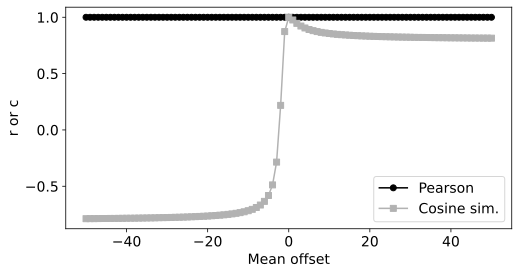

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


In [28]:
var = np.arange(4, dtype=float)
off = np.arange(-50,51)

results = np.zeros((len(off),2))

for i in range(len(off)):
    results[i,:] = correlation(var,var+off[i])


# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(off,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.show()
print(off)

### Exercise 3 - There are several functions to compute the Pearson correlation coefficient. one of which is pearsonr in the stats module of SciPy library. Open the source code for the file and make sure to understand how the python implementation maps onto the formulas introduced in this chapter.

In [1]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelat

### Exercise 4 - Modify correlation function to only include pearson and see if it runs faster than numpy's corrcoef function.

In [2]:
def correlation(x,y):
    x_per = x - np.mean(x)
    y_per = y - np.mean(y)
    num = np.dot(x_per,y_per)
    denom = np.linalg.norm(x_per) * np.linalg.norm(y_per)
    return num / denom

In [34]:
import random
import time

n_iter = 1000
points = 500

tic = time.time()
for i in range(n_iter):
    x = np.random.randn(points,2)
    correlation(x[:,0], x[:,1])
t1 = time.time() - tic


tic = time.time()
for i in range(n_iter):
  x = np.random.randn(points,2)
  pearsonr(x[:,0],x[:,1]) # select all rows and 0(first column) and 1(second column)
t2 = time.time() - tic


print(t1*1000)
print(t2*1000)


33.3707332611084
310.7280731201172


In [12]:
# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d


# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 34.69 ms
   pearsonr took 297.25 ms


In [37]:
days_per_page = 58/8

pages = 278

days_to_finish = pages / days_per_page
days_to_finish

38.3448275862069

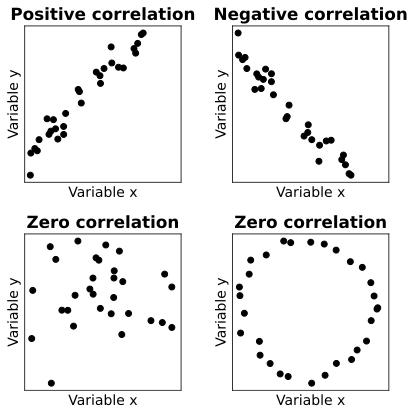

In [3]:

N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)


# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation',fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')


# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation',fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')


# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')


# zero correlation, part 2
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')


plt.tight_layout()
plt.savefig('Figure_04_01.png',dpi=300) # write out the fig to a file
plt.show()

## Filtering and feature detection exercises 

### Exercise 5 - 

In [ ]:
### Note: The code for k-means is in Exercise 7 below.

# Exercise 1

In [12]:
# the function
def corrAndCosine(x,y):

  # compute cosine similarity
  num = np.dot(x,y) # numerator
  den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
  cos = num / den

  # compute correlation (similar to above but mean-centered!)
  xm  = x-np.mean(x)
  ym  = y-np.mean(y)
  num = np.dot(xm,ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  return cor,cos


# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = corrAndCosine(a,b)
print(r,c)

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])

0.23270824824443576 0.24433732956492327
0.23270824824443576 0.23270824824443576


In [10]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)


# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print( np.round(corrAndCosine(a,b),4) )
print(' ')

print('With mean-centering (should be the same):')
print( np.round(corrAndCosine(aNoMean,bNoMean),4) )

# NOTE: In the printing code above, I rounded to 4 significant digits just for visual clarity.

Without mean-centering (should differ):
[-0.1316  0.0723]
 
With mean-centering (should be the same):
[-0.1316 -0.1316]


## Exercise 2

In [ ]:
# create the variables
a = np.arange(4,dtype=float)
offsets = np.arange(-50,51)

# initialize the results
results = np.zeros((len(offsets),2))

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a,a+offsets[i])


# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_04_02.png',dpi=300) # write out the fig to a file
plt.show()

## Exercise 3

In [ ]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

## Exercise 4

In [ ]:
# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d


# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

# Exercise 5

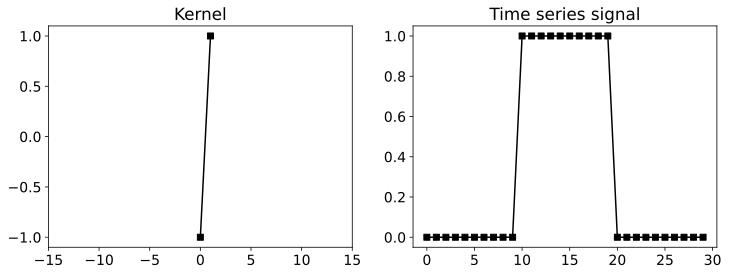

In [4]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_04_04ab.png',dpi=300)
plt.show()

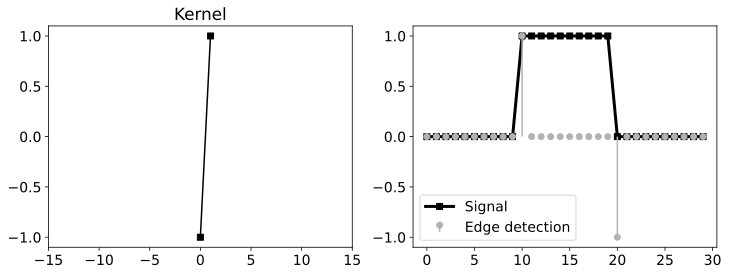

In [5]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

# loop over the signal and do template-matching (via dot products!)
for t in range(1,len(signal)-1):
  featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# plot the result
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])


axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.savefig('Figure_04_04c.png',dpi=300)
plt.show()

# Exercise 6

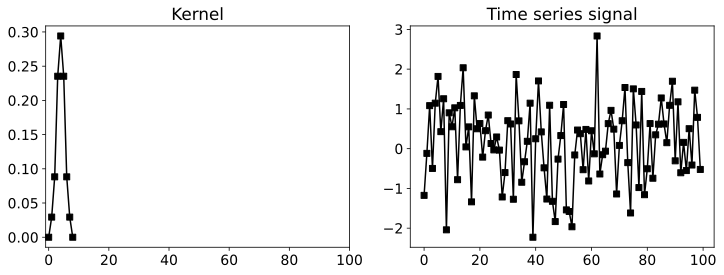

In [6]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_04_06ab.png',dpi=300)
plt.show()

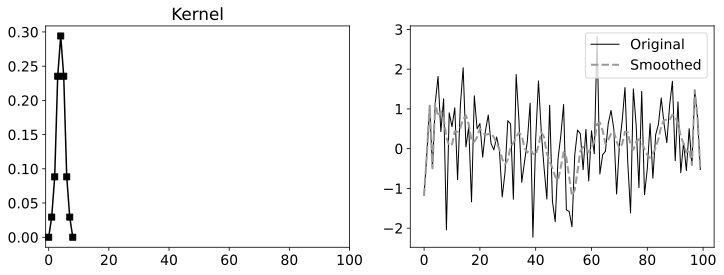

In [7]:
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_04_06c.png',dpi=300)
plt.show()

# Exercise 7

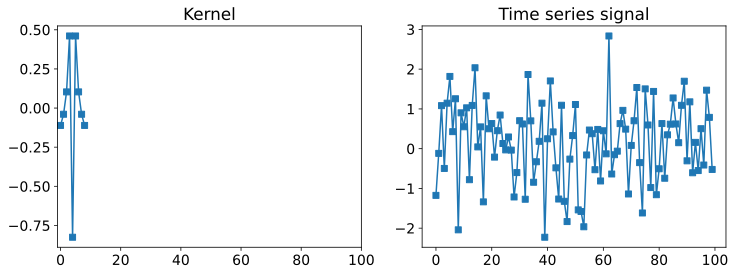

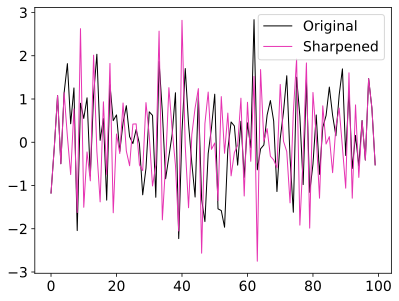

In [8]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()



# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

# Exercise 8

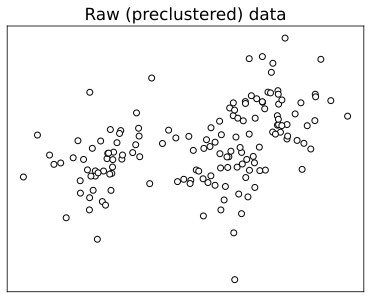

In [9]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

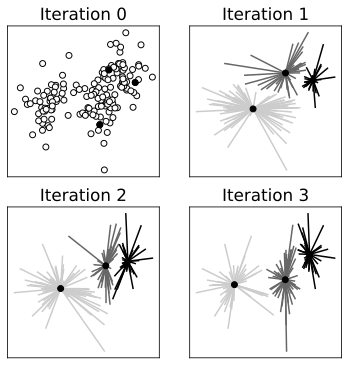

In [10]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_04_03.png',dpi=300)
plt.show()